# pytesseract (pdf2image)

In [1]:
#pip install pytesseract pdf2image 

In [3]:
import pytesseract 
from pdf2image import convert_from_path

In [5]:
# PDF 파일 경로 
pdf_path = "D:/[24]ICT_Practice/practice_file/포트미스_회원가입_및_선박제원_신고방법안내.pdf"
# PDF를 이미지로 변환 
images = convert_from_path(pdf_path) 

# OCR 수행 및 결과 출력
for i, image in enumerate(images):
    # 이미지를 흑백으로 변환하여 OCR 수행
    text = pytesseract.image_to_string(image, lang='kor+eng')  # 한국어와 영어 동시 지원
    # OCR 결과 출력
    print(f'Page {i+1} OCR Result:')
    print(text)
    print('---')

Page 1 OCR Result:
_ 포트미스회원가입

첨부서류제출

선박제원신고

= %

포트미스접속
(portmis.go.kr)

회원정보입력

@

회원가입신청

선박제원정보입력

화면오른쪽상단
회원가입클릭

사업자등록정보조회

회원가입승인대기

청(승인대기 ————>

사용목적선택

사업자등록정보입력

회원가입승인

회원가

인 om
터 HT

처리흐


---
Page 2 OCR Result:
포트미스 회원가입

-회원가입 절차

회원가입
OO                       ^
Step

Step
0」 ABSA 선택    02 약관동의

anos TALL

+]                                                                                                       해문할만 핀원신고를 위해서는 회원가입이 필묘합니다.
PORT-M Is                                                                    해운항만물류정보시스팀의 사용목적을 선택해주세요.

HORA. 무사하마꼬나 - 이  :                  테        a8
PARR A A         eae MEN EER Mu

it                                                      회

비

SeeNTe | RR AHBBEA
each)                  4


---
Page 3 OCR Result:
_ 포트미스회원가입

미스 회원가입

회원가입

AM BF

ate See

ER

2B 환국 SAU SERS NOTH AERE EN
E1ftppanegolr 31 HES ORT ORY OH IONS: CTL 8
2.089 808 FEBS SRE BUC,

점

ERO Nee S02] Boe SA SSL:

1 PORTMISE: 32317) PERG Goo 180) GBT 항칸나 ASE BAAS

# 네이버 클로바 OCR

In [18]:
#pip install PyMuPDF

In [4]:
#https://sooeun67.github.io/data%20science/ocr-naver-clova/

In [2]:
import time
import pandas as pd
import cv2
import json
import matplotlib.pyplot as plt

import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

import requests
import uuid
import time
import json

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 5000)

In [10]:
secret_key = "개인키"
api_url = "개인키"

OCR 결과를 받아오지 못했습니다. 상태 코드: 400


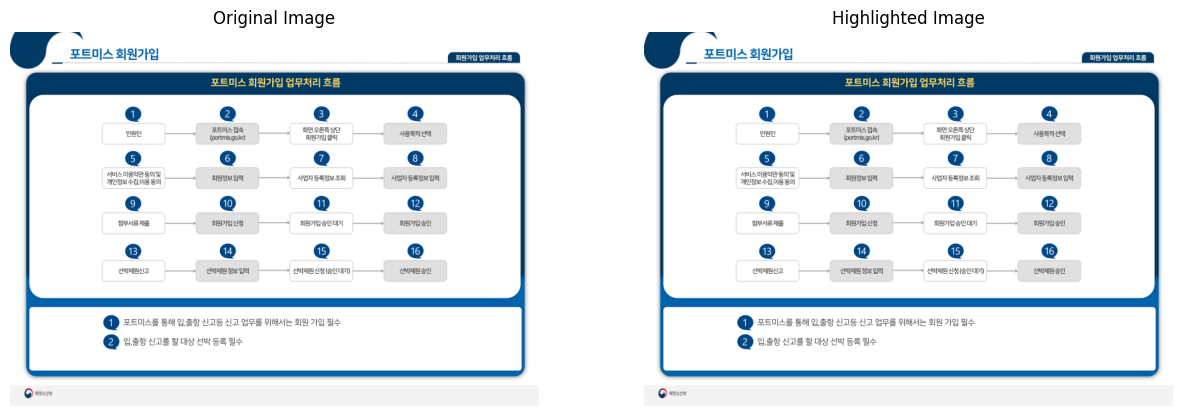

In [11]:
image_file = 'D:/[24]ICT_Practice/practice_file/OCR/0.png'

# Setting up the request JSON
request_json = {
    'images': [
        {
            'format': 'jpg',
            'name': 'demo'
        }
    ],
    'requestId': str(uuid.uuid4()),
    'version': 'V2',
    'timestamp': int(round(time.time() * 1000))
}

payload = {'message': json.dumps(request_json).encode('UTF-8')}
files = [('file', open(image_file,'rb'))]
headers = {'X-OCR-SECRET': secret_key}

# Make the OCR request
response = requests.request("POST", api_url, headers=headers, data=payload, files=files)

# Load the original image for visualization
image = cv2.imread(image_file)
highlighted_image = image.copy()

# OCR 응답 처리
if response.status_code == 200:
    ocr_results = json.loads(response.text)
    all_texts = []  # 모든 텍스트를 저장할 리스트
    for image_result in ocr_results['images']:
        for field in image_result['fields']:
            text = field['inferText']
            all_texts.append(text)  # 텍스트 추가

            # 텍스트 주변에 빨간 사각형 그리기
            bounding_box = field['boundingPoly']['vertices']
            start_point = (int(bounding_box[0]['x']), int(bounding_box[0]['y']))
            end_point = (int(bounding_box[2]['x']), int(bounding_box[2]['y']))
            cv2.rectangle(highlighted_image, start_point, end_point, (0, 0, 255), 2)

    # 모든 텍스트를 띄어쓰기로 연결하여 출력
    full_text = ' '.join(all_texts)
    print(full_text)
else:
    print(f"OCR 결과를 받아오지 못했습니다. 상태 코드: {response.status_code}")


# Display the original and highlighted images side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(cv2.cvtColor(highlighted_image, cv2.COLOR_BGR2RGB))
axs[1].set_title('Highlighted Image')
axs[1].axis('off')

plt.show()

In [6]:
# 테스트 이미지 파일 경로 목록
image_paths = {
    '0': 'D:/[24]ICT_Practice/practice_file/OCR/0.png',
    '1': 'D:/[24]ICT_Practice/practice_file/OCR/1.png',
    '2': 'D:/[24]ICT_Practice/practice_file/OCR/2.png',
    '3': 'D:/[24]ICT_Practice/practice_file/OCR/3.png',
    '4': 'D:/[24]ICT_Practice/practice_file/OCR/4.png'
}

# 결과를 저장할 DataFrame
ocr_results_df = pd.DataFrame(columns=['이미지 유형', 'OCR 결과', '처리 시간 (초)'])

# 각 이미지를 처리하고 결과 저장
for image_type, image_path in image_paths.items():
    start_time = time.time()

    # 요청 데이터 준비
    request_json = {
        'images': [{'format': 'jpg', 'name': 'demo'}],
        'requestId': str(uuid.uuid4()),
        'version': 'V2',
        'timestamp': int(round(time.time() * 1000))
    }
    payload = {'message': json.dumps(request_json).encode('UTF-8')}
    files = [('file', open(image_path, 'rb'))]
    headers = {'X-OCR-SECRET': secret_key}

    # 요청 전송
    response = requests.request("POST", api_url, headers=headers, data=payload, files=files)
    processing_time = time.time() - start_time

    # 응답 처리
    if response.status_code == 200:
        ocr_result = json.loads(response.text)
        text_results = " ".join([field['inferText'] for image in ocr_result['images'] for field in image['fields']])
    else:
        text_results = "처리 실패"

    new_row = pd.DataFrame([{
        '이미지 유형': image_type,
        'OCR 결과': text_results,
        '처리 시간 (초)': processing_time
    }])
    ocr_results_df = pd.concat([ocr_results_df, new_row], ignore_index=True)

# DataFrame 출력
print(ocr_results_df)

C:\Users\유승미\AppData\Local\Temp\ipykernel_23400\421242491.py:47: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ocr_results_df = pd.concat([ocr_results_df, new_row], ignore_index=True)


  이미지 유형 OCR 결과  처리 시간 (초)
0      0  처리 실패   0.156960
1      1  처리 실패   0.259580
2      2  처리 실패   0.268923
3      3  처리 실패   0.205395
4      4  처리 실패   0.223248
